In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

eurostoxx50 = yf.Ticker("^STOXX50E")
data = eurostoxx50.history(period="max")

print(data.head())

                                  Open         High          Low        Close  \
Date                                                                            
2007-03-30 00:00:00+02:00  4177.669922  4207.759766  4160.350098  4181.029785   
2007-04-02 00:00:00+02:00  4177.310059  4191.759766  4163.770020  4189.549805   
2007-04-03 00:00:00+02:00  4199.540039  4248.069824  4199.540039  4246.299805   
2007-04-04 00:00:00+02:00  4252.709961  4261.830078  4242.049805  4261.830078   
2007-04-05 00:00:00+02:00  4259.979980  4274.169922  4253.790039  4271.540039   

                           Volume  Dividends  Stock Splits  
Date                                                        
2007-03-30 00:00:00+02:00       0        0.0           0.0  
2007-04-02 00:00:00+02:00       0        0.0           0.0  
2007-04-03 00:00:00+02:00       0        0.0           0.0  
2007-04-04 00:00:00+02:00       0        0.0           0.0  
2007-04-05 00:00:00+02:00       0        0.0           0.0  


In [6]:
# Filtre pour les données des périodes spécifiques
data['Year'] = data.index.year
years_to_study = [2008, 2012, 2016, 2020]
filtered_data = data[data['Year'].isin(years_to_study)]

In [7]:
# Fonction pour calculer les rendements : J+2, jusqu'à fin novembre, jusqu'à fin d'année et 1 ans plus tard

def calculate_returns(df, year):
    # Extraire les données pour l'année spécifique
    year_data = df[df['Year'] == year]
    
    # Rendement sur 2 jours (élection et lendemain)
    two_day_return = (year_data.iloc[1]['Close'] / year_data.iloc[0]['Close'] - 1) * 100
    
    # Rendement jusqu'à la fin de novembre
    end_of_november = year_data[year_data.index.month == 11].iloc[-1]['Close']
    end_of_year = year_data.iloc[-1]['Close']
    end_of_november_return = (end_of_november / year_data.iloc[0]['Close'] - 1) * 100

    # Rendement jusqu'à la fin de l'année
    end_of_year_return = (end_of_year / year_data.iloc[0]['Close'] - 1) * 100
    
    # Rendement un an plus tard
    next_year_data = df[df['Year'] == year + 1]
    if not next_year_data.empty:
        one_year_later_return = (next_year_data.iloc[-1]['Close'] / year_data.iloc[0]['Close'] - 1) * 100
    else:
        one_year_later_return = None  # Si les données pour l'année suivante ne sont pas disponibles
    
    return {
        "Year": year,
        "Two-Day Return": two_day_return,
        "End of November Return": end_of_november_return,
        "End of Year Return": end_of_year_return,
        "One Year Later Return": one_year_later_return
    }

returns_summary = [calculate_returns(data, year) for year in years_to_study]

# Convertissons en DataFrame pour affichage
returns_df = pd.DataFrame(returns_summary)
print(returns_df)

   Year  Two-Day Return  End of November Return  End of Year Return  \
0  2008       -1.451282              -43.917042          -43.428515   
1  2012       -1.674541                7.755108            9.914189   
2  2016        0.418673               -3.575308            3.973761   
3  2020       -0.552559               -7.442421           -5.347475   

   One Year Later Return  
0             -31.549676  
1              29.750913  
2              10.718031  
3              14.117346  


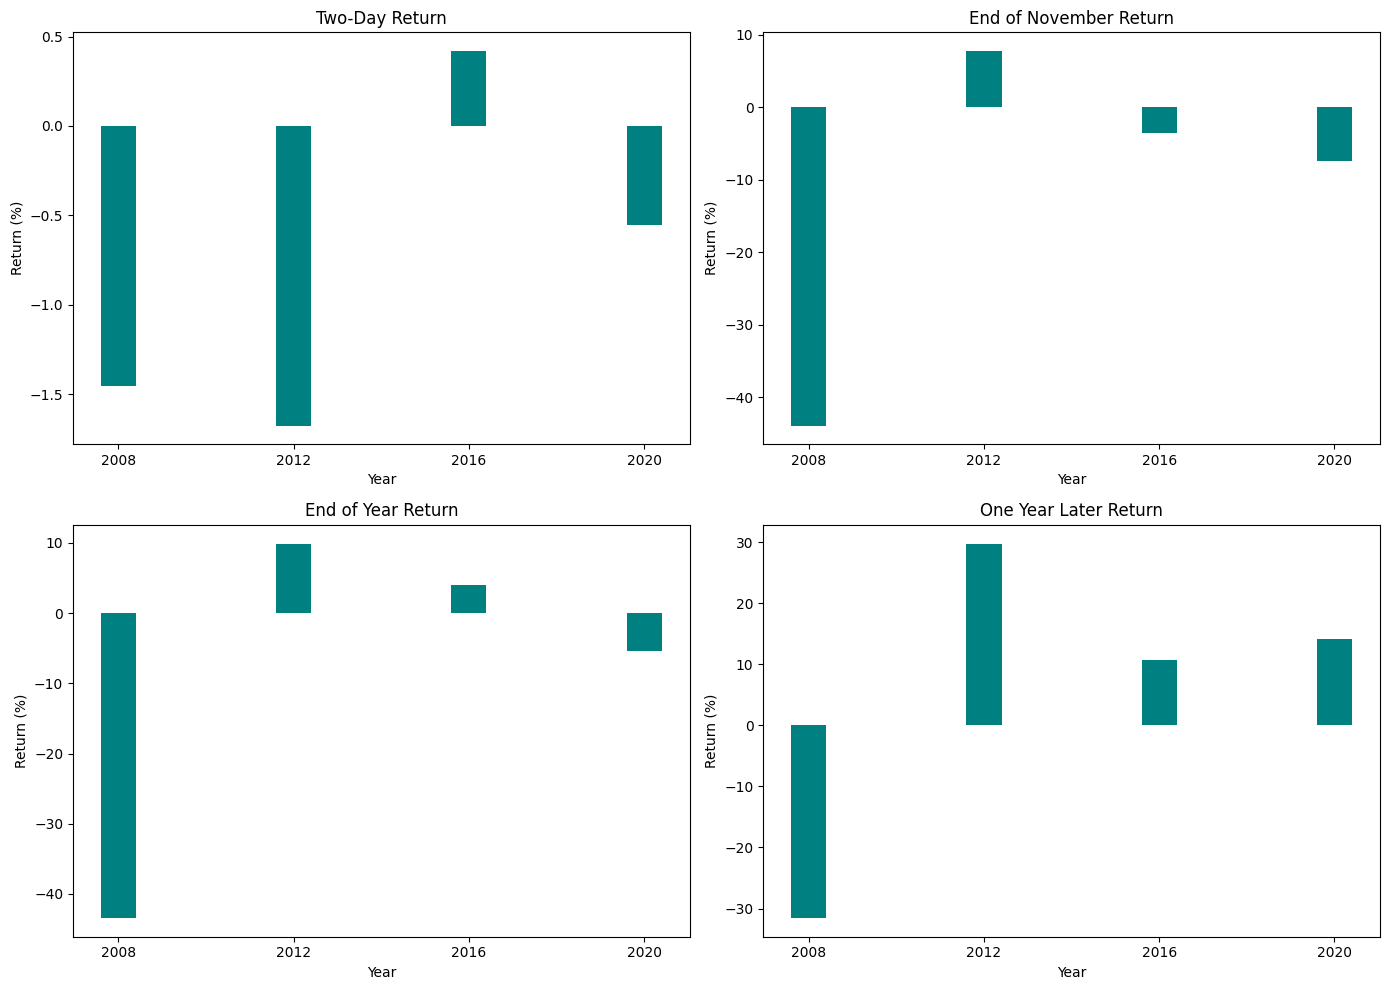

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Liste des noms de colonnes pour les rendements
return_types = ["Two-Day Return", "End of November Return", "End of Year Return", "One Year Later Return"]

# Créons un histogramme pour chaque type de rendement
for i, return_type in enumerate(return_types):
    axes[i].bar(returns_df["Year"], returns_df[return_type], color='teal')
    axes[i].set_title(return_type)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Return (%)")
    axes[i].set_xticks(returns_df["Year"])

plt.tight_layout()
plt.show()